In [14]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 

movie_df = pd.read_csv('Data/Complete_CLEAN_IMDB_Data2.csv')
movies_w_opening = pd.read_csv('Data/tmdb_movies_df_CLEAN.csv')

In [13]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1163 non-null   int64  
 1   Unnamed: 0_x       1163 non-null   int64  
 2   tconst             1163 non-null   object 
 3   primary_title      1163 non-null   object 
 4   original_title     1163 non-null   object 
 5   start_year         1163 non-null   int64  
 6   runtime_minutes    1163 non-null   float64
 7   genres             1163 non-null   object 
 8   Action             1163 non-null   bool   
 9   Crime              1163 non-null   bool   
 10  Drama              1163 non-null   bool   
 11  Biography          1163 non-null   bool   
 12  Comedy             1163 non-null   bool   
 13  Fantasy            1163 non-null   bool   
 14  Horror             1163 non-null   bool   
 15  Thriller           1163 non-null   bool   
 16  Adventure          1163 

In [15]:
#This isn't necessary for the sucess of the code the extra columns just drive me crazy
ol_drop = ['Unnamed: 0','Unnamed: 0_x','start_year_str','Unnamed: 0_y', 'Clean Title','Unnamed: 0_x.1',
           'Unnamed: 0_y.1','Domestic Gross_x','Year_y','nameYear']

movie_df.drop(col_drop, axis = 1, inplace = True)

## Merge just the release date info from TMDB ##

In [17]:
df = movie_df.merge(movies_w_opening[['Release Date','Link']],on='Link')

In [19]:
#also unnecessary for the success of the visualization 

keep_cols = ['tconst', 'primary_title' ,'original_title' , 'start_year' , 'runtime_minutes', 'genres', 
             'Year_x', 'Average Rating', 'Number of Votes' , 'Movie' ,'Production Budget', 'Domestic Gross_y',
             'Worldwide Gross' ,'Profit', 'ROI','Studio','Release Date'] 
df = df[keep_cols]

## Create a Month column for x-axis values ##

In [20]:
df['Month'] = df['Release Date'].str[5:7]
# month = {'01':'Janauary','02':'February','03':'March','04':'April','05':'May','06':'June',
#          '07':'July','08':'August','09':'September','10':'October','11':'November','12':'December'}

# df['Month Name']=df["Month"].apply(lambda x: month.get(x))
df['Month']=df['Month'].astype(int)
df.sort_values(['Month'], inplace=True)


In [21]:
df.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Year_x,Average Rating,Number of Votes,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI,Studio,Release Date,Month
802,tt2283362,Jumanji: Welcome to the Jungle,Jumanji: Welcome to the Jungle,2017,119.0,"Action,Adventure,Comedy",2017,7.0,242735,jumanji welcome to the jungle,90000000,404508916,964496193,874496193,10.716624,Sony,2017-12-20,12
803,tt2283362,Jumanji: Welcome to the Jungle,Jumanji: Welcome to the Jungle,2017,119.0,"Action,Adventure,Comedy",2017,7.0,242735,jumanji welcome to the jungle,90000000,404508916,964496193,874496193,10.716624,Sony,2017-12-20,12
811,tt2304771,Mandela: Long Walk to Freedom,Mandela: Long Walk to Freedom,2013,141.0,"Biography,Drama,History",2013,7.1,25027,mandela long walk to freedom,35000000,8323085,29890402,-5109598,0.854011,Wein.,2013-12-25,12
642,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",2012,8.4,1211405,django unchained,100000000,162805434,449948323,349948323,4.499483,Wein.,2012-12-25,12
1259,tt7959026,The Mule,The Mule,2018,116.0,"Crime,Drama,Thriller",2018,7.1,58955,the mule,50000000,103804407,170857676,120857676,3.417154,WB,2018-12-14,12


## Explode 'genres' column to get genre value counts using pivot table ##

In [24]:
df['genres'] = df['genres'].apply(lambda x: x.split(","))
df_exploded = df.explode('genres')
df_exploded

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Year_x,Average Rating,Number of Votes,Movie,Production Budget,Domestic Gross_y,Worldwide Gross,Profit,ROI,Studio,Release Date,Month
349,tt1418377,"I, Frankenstein","I, Frankenstein",2014,92.0,Action,2014,5.1,74910,i frankenstein,65000000,19075290,74575290,9575290,1.147312,LGF,2014-01-24,1
349,tt1418377,"I, Frankenstein","I, Frankenstein",2014,92.0,Fantasy,2014,5.1,74910,i frankenstein,65000000,19075290,74575290,9575290,1.147312,LGF,2014-01-24,1
349,tt1418377,"I, Frankenstein","I, Frankenstein",2014,92.0,Horror,2014,5.1,74910,i frankenstein,65000000,19075290,74575290,9575290,1.147312,LGF,2014-01-24,1
226,tt1235522,Broken City,Broken City,2013,109.0,Crime,2013,6.2,71704,broken city,35000000,19701164,34480045,-519955,0.985144,Fox,2013-01-18,1
226,tt1235522,Broken City,Broken City,2013,109.0,Drama,2013,6.2,71704,broken city,35000000,19701164,34480045,-519955,0.985144,Fox,2013-01-18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,tt1853728,Django Unchained,Django Unchained,2012,165.0,Drama,2012,8.4,1211405,django unchained,100000000,162805434,449948323,349948323,4.499483,Wein.,2012-12-25,12
642,tt1853728,Django Unchained,Django Unchained,2012,165.0,Western,2012,8.4,1211405,django unchained,100000000,162805434,449948323,349948323,4.499483,Wein.,2012-12-25,12
1259,tt7959026,The Mule,The Mule,2018,116.0,Crime,2018,7.1,58955,the mule,50000000,103804407,170857676,120857676,3.417154,WB,2018-12-14,12
1259,tt7959026,The Mule,The Mule,2018,116.0,Drama,2018,7.1,58955,the mule,50000000,103804407,170857676,120857676,3.417154,WB,2018-12-14,12


In [25]:
df_exploded.groupby(['genres'])

In [26]:
per_month_genre = pd.pivot_table(df_exploded, values='Worldwide Gross', index=['Month'],
                    columns=['genres'], aggfunc='count', fill_value=0)

In [22]:
per_month_genre

genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
Month,,,,,,,,,,,,,,,,,,,,,
1,29,9,3,0,21,15,0,21,2,9,...,15,1,0,9,3,2,0,16,0,0
2,24,21,6,6,28,8,2,33,2,7,...,9,2,0,7,18,7,2,18,1,0
3,38,33,8,5,34,16,0,45,6,15,...,9,2,0,10,14,14,0,12,1,1
4,20,10,5,3,32,16,0,29,6,4,...,7,0,0,3,14,9,1,12,1,0
5,32,30,3,2,33,6,1,27,5,10,...,6,1,0,3,16,10,2,7,1,1
6,34,36,13,7,47,12,0,35,2,8,...,9,4,1,7,14,13,1,10,0,0
7,40,37,12,4,43,12,2,35,9,6,...,12,3,0,10,15,19,1,17,0,1
8,34,19,4,7,34,18,1,49,5,7,...,11,8,0,4,12,7,1,19,1,1
9,43,17,8,17,36,29,3,67,5,2,...,25,3,0,13,20,9,4,30,0,1


In [23]:
per_month_sum = df['Month'].value_counts()
per_month_sum

11    159
12    154
10    148
9     130
7     102
3      97
8      95
6      95
2      76
5      74
4      70
1      60
Name: Month, dtype: int64

In [24]:
type(per_month_sum)

pandas.core.series.Series

In [25]:
per_month_sum.sort_index(inplace = True)
x= per_month_sum.index.tolist()
y =per_month_sum.tolist()
y


[60, 76, 97, 70, 74, 95, 102, 95, 130, 148, 159, 154]

In [26]:
y_action = per_month_genre['Action'].tolist()
y_action

[29, 24, 38, 20, 32, 34, 40, 34, 43, 35, 33, 29]

In [41]:
y_horror = per_month_genre['Horror'].tolist()
y_horror

[15, 9, 9, 7, 6, 9, 12, 11, 25, 20, 7, 3]

In [28]:
y_mystery = per_month_genre['Mystery'].tolist()
y_mystery

[9, 7, 10, 3, 3, 7, 10, 4, 13, 27, 6, 5]

In [30]:
y_thriller = per_month_genre['Thriller'].tolist()
y_thriller

[16, 18, 12, 12, 7, 10, 17, 19, 30, 41, 18, 12]

In [32]:
y_doc = per_month_genre['Documentary'].tolist()
y_doc

[0, 2, 0, 0, 1, 0, 2, 1, 3, 3, 0, 1]

In [36]:
y_music = per_month_genre['Music'].tolist()
y_music

[1, 2, 2, 0, 1, 4, 3, 8, 3, 5, 3, 7]

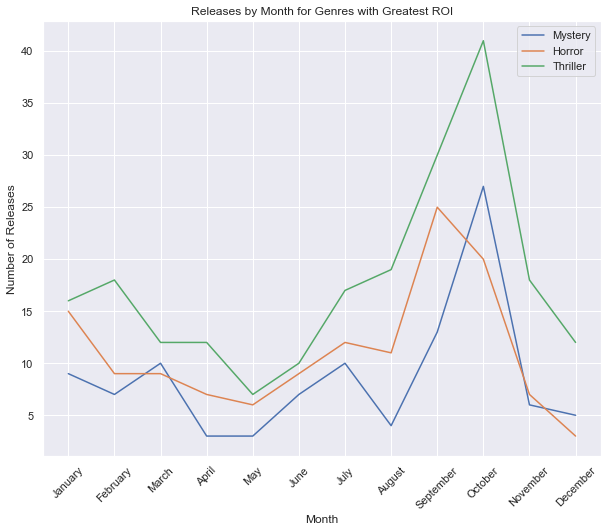

In [44]:
fig, ax=plt.subplots(figsize=(10, 8))

sns.set_theme()
# ax.plot(x,y) #total number of movies
ax.plot(x,y_mystery, label='Mystery')
ax.plot(x,y_horror, label='Horror')
ax.plot(x, y_thriller, label = 'Thriller')
# ax.plot(x, y_doc, label = 'Documentary')
# ax.plot(x, y_music, label = 'Music')


positions = (1, 2, 3,4,5,6,7,8,9,10,11,12)
labels = ('January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December')
plt.xticks(positions, labels, rotation = 45)
plt.title('Releases by Month for Genres with Greatest ROI')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.legend()
